In [1]:
## Import libraries and load dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## Read Data set and see top and bottom rows to have quick glimpse of data
df=pd.read_csv("Chat_Team_CaseStudy.csv")

In [3]:
df.head(2)

,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,08-06-18 23:59,Zaha,0:18:22,Mobile Service Team,Session:2057187615:23360,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,08-07-18 0:18,,,False,0:00:01
1,08-06-18 23:59,Berenice,0:03:05,Mobile Technical Team,Session:2057187614:23368,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,08-07-18 0:02,,,True,0:01:01


In [4]:
df.tail(2)

,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
31950,08-06-18 0:00,Legalos,0:15:13,Mobile Service Team,Session:2057187615:7772,0,Customer,True,Other,11.4.1,NaN,0:00:51,0:01:00,08-06-18 0:27,,,False,0:00:00
31951,08-06-18 0:00,Paisley,0:03:06,Mobile Service Team,Session:2057187617:29175,0,Representative,False,Other,MacOS,NaN,0:00:00,0:00:00,08-06-18 0:03,,,False,0:00:52


In [5]:
## Get shape of data to understand number of observations
df.shape

(31952, 18)

In [6]:
## Get Feature names of dataset
df.keys()

Index(['Transaction Start Date', 'Agent', 'Chat Duration', 'Teams',
       'Session Name', 'Order Value', 'Chat Closed By', 'Interactive Chat',
       'Browser', 'Operating System', 'Geo', 'Response Time of Agent',
       'Response time of Visitor', 'Transaction End Date', 'Customer Rating',
       'Customer Comment', 'Transferred Chat', 'Customer Wait Time'],
      dtype='object')

In [7]:
df.columns

Index(['Transaction Start Date', 'Agent', 'Chat Duration', 'Teams',
       'Session Name', 'Order Value', 'Chat Closed By', 'Interactive Chat',
       'Browser', 'Operating System', 'Geo', 'Response Time of Agent',
       'Response time of Visitor', 'Transaction End Date', 'Customer Rating',
       'Customer Comment', 'Transferred Chat', 'Customer Wait Time'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=31952, step=1)

In [9]:
### Get full Decription/summary of dataset
df.describe()

,Order Value
count,31952.000000
mean,1.242927
std,50.249189
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4512.000000


In [10]:
## Get full info about all variables/features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31952 entries, 0 to 31951
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Transaction Start Date    31952 non-null  object
 1   Agent                     31952 non-null  object
 2   Chat Duration             31952 non-null  object
 3   Teams                     31952 non-null  object
 4   Session Name              31952 non-null  object
 5   Order Value               31952 non-null  int64 
 6   Chat Closed By            31741 non-null  object
 7   Interactive Chat          31952 non-null  bool  
 8   Browser                   31952 non-null  object
 9   Operating System          31952 non-null  object
 10  Geo                       17665 non-null  object
 11  Response Time of Agent    31952 non-null  object
 12  Response time of Visitor  31952 non-null  object
 13  Transaction End Date      31952 non-null  object
 14  Customer Rating       

In [11]:
df.dtypes

Transaction Start Date      object
Agent                       object
Chat Duration               object
Teams                       object
Session Name                object
Order Value                  int64
Chat Closed By              object
Interactive Chat              bool
Browser                     object
Operating System            object
Geo                         object
Response Time of Agent      object
Response time of Visitor    object
Transaction End Date        object
Customer Rating             object
Customer Comment            object
Transferred Chat              bool
Customer Wait Time          object
dtype: object

In [12]:
##Understand the data types of Dataset and downgrade its type to save memory
df["Order Value"].dtype

dtype('int64')

In [13]:
### to find the unique value of order value on int64 only
for k in df.keys():
    if "int64" in str(df[k].dtype):
        print(k,df[k].dtype,df[k].min(),df[k].max())
    

Order Value int64 0 4512


In [14]:
df["Order Value"].unique()  ## unique value

array([   0,  432,  540, 2016, 1896,  960, 1560, 1920,  290, 2496, 2136,
       1416, 2296, 4512,  660,  600, 2400, 1800,  840], dtype=int64)

In [15]:
#### conversion int64 into int16
df["Order Value"]=df["Order Value"].astype("int16")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31952 entries, 0 to 31951
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Transaction Start Date    31952 non-null  object
 1   Agent                     31952 non-null  object
 2   Chat Duration             31952 non-null  object
 3   Teams                     31952 non-null  object
 4   Session Name              31952 non-null  object
 5   Order Value               31952 non-null  int16 
 6   Chat Closed By            31741 non-null  object
 7   Interactive Chat          31952 non-null  bool  
 8   Browser                   31952 non-null  object
 9   Operating System          31952 non-null  object
 10  Geo                       17665 non-null  object
 11  Response Time of Agent    31952 non-null  object
 12  Response time of Visitor  31952 non-null  object
 13  Transaction End Date      31952 non-null  object
 14  Customer Rating       

In [17]:
## See if any missing values are present in data set
df.isnull().sum()

Transaction Start Date          0
Agent                           0
Chat Duration                   0
Teams                           0
Session Name                    0
Order Value                     0
Chat Closed By                211
Interactive Chat                0
Browser                         0
Operating System                0
Geo                         14287
Response Time of Agent          0
Response time of Visitor        0
Transaction End Date            0
Customer Rating                 0
Customer Comment                0
Transferred Chat                0
Customer Wait Time              0
dtype: int64

<AxesSubplot:>

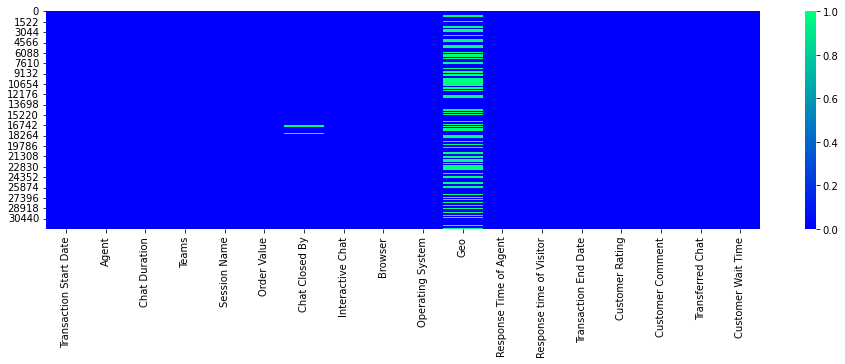

In [18]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull(),cmap="winter")

In [29]:
### lets try to fill unique value with help of fillna 
df["Chat Closed By"].unique()


array(['Customer', 'Representative', 'System', nan], dtype=object)

In [30]:
df["Chat Closed By"].mode()[0]

'Customer'

In [31]:
df["Chat Closed By"].fillna(df["Chat Closed By"].mode()[0])

0              Customer
1        Representative
2              Customer
3                System
4        Representative
              ...      
31947          Customer
31948          Customer
31949            System
31950          Customer
31951    Representative
Name: Chat Closed By, Length: 31952, dtype: object

In [32]:
df["Chat Closed By"]=df["Chat Closed By"].fillna(df["Chat Closed By"].mode()[0])

In [33]:
df["Chat Closed By"].isnull().sum()

0

In [34]:
df["Geo"].unique()

array(['Sweden', 'Australia', 'Philippines', 'Germany', 'United Kingdom',
       'Belgium', 'Thailand', 'Canada', 'Asia/Pacific Region', 'Russia',
       'United States', 'Ireland', 'Indonesia', 'Spain', 'Morocco',
       'France', 'China', 'Mexico', 'UNKNOWN', 'Belarus', 'Malaysia',
       'Hong Kong', 'Slovenia', 'Vietnam', 'India', 'Pakistan',
       'Papua New Guinea', 'Greece', 'Taiwan', 'Singapore',
       'United Arab Emirates', 'Uzbekistan', 'Switzerland', 'Romania',
       'Portugal', '{}', 'Norway', 'Japan', 'Czech Republic', 'Croatia',
       'Netherlands', 'Macedonia', 'New Zealand', 'Russian Federation',
       'Hungary', 'Italy', 'Turkey', 'Iceland', 'Saudi Arabia', 'Fiji',
       'Qatar', 'Austria', 'Egypt', 'Israel', 'Denmark', 'Jamaica',
       'Europe', 'Kuwait', 'Malta', 'Sri Lanka', 'South Africa',
       'Lebanon'], dtype=object)

In [35]:
df["Geo"].mode()

0    Australia
Name: Geo, dtype: object

In [36]:
df["Geo"]=df["Geo"].fillna(df["Geo"].mode()[0])

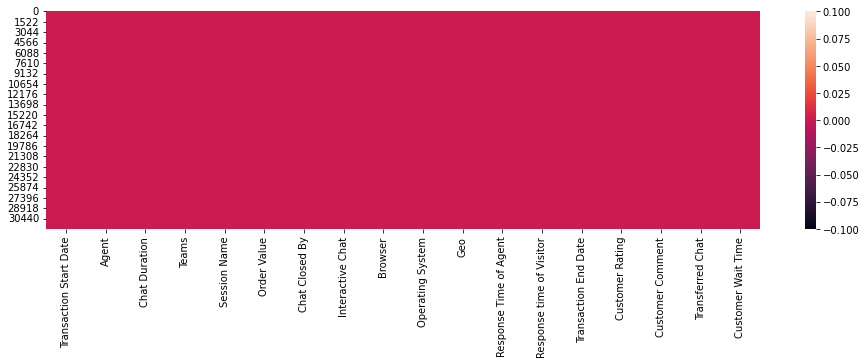

In [37]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [38]:
### Get unique values for each feature, this will help you to get to know if any unwanted characters are present in dataset
for k in df.keys():
    print(k,df[k].unique()[:5])
    

Transaction Start Date ['08-06-18 23:59' '08-06-18 23:58' '08-06-18 23:57' '08-06-18 23:56'
 '08-06-18 23:55']
Agent ['Zaha' 'Berenice' 'Madi' 'Rose' 'Sarrah']
Chat Duration ['0:18:22' '0:03:05' '0:22:33' '0:38:20' '0:11:50']
Teams ['Mobile Service Team' 'Mobile Technical Team' 'Fixed Service Team'
 'Sales Team' 'Fixed Technical Team']
Session Name ['Session:2057187615:23360' 'Session:2057187614:23368'
 'Session:2057187615:23358' 'Session:2057187616:18361'
 'Session:2057187617:2598']
Order Value [   0  432  540 2016 1896]
Chat Closed By ['Customer' 'Representative' 'System']
Interactive Chat [ True False]
Browser ['Edge 16.16299' 'Edge' 'c~67.0.3396.87' 'Other' 'Chrome']
Operating System ['Windows-10' 'Windows' 'Android-4.3' '11.4.1' 'Android 8.1.0']
Geo ['Sweden' 'Australia' 'Philippines' 'Germany' 'United Kingdom']
Response Time of Agent ['0:01:02' '0:00:00' '0:00:32' '0:00:37' '0:00:21']
Response time of Visitor ['0:00:43' '0:00:00' '0:01:28' '0:01:18' '0:00:38']
Transaction End Dat

In [39]:
### Decide if features needs to be dropped
df.head(5)

,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,08-06-18 23:59,Zaha,0:18:22,Mobile Service Team,Session:2057187615:23360,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,08-07-18 0:18,,,False,0:00:01
1,08-06-18 23:59,Berenice,0:03:05,Mobile Technical Team,Session:2057187614:23368,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,08-07-18 0:02,,,True,0:01:01
2,08-06-18 23:59,Madi,0:22:33,Mobile Service Team,Session:2057187615:23358,0,Customer,True,c~67.0.3396.87,Android-4.3,Australia,0:00:32,0:01:28,08-07-18 0:26,,,False,0:00:01
3,08-06-18 23:59,Rose,0:38:20,Mobile Service Team,Session:2057187616:18361,0,System,True,Other,11.4.1,Australia,0:00:37,0:01:18,08-07-18 0:38,,,False,0:00:01
4,08-06-18 23:59,Sarrah,0:11:50,Fixed Service Team,Session:2057187617:2598,0,Representative,True,Other,Android 8.1.0,Australia,0:00:21,0:00:38,08-07-18 0:14,,,False,0:00:01


In [40]:
df.drop(["Session Name","Transaction Start Date","Transaction End Date"],axis=1,inplace=True)

In [41]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,0:18:22,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,,,False,0:00:01
1,Berenice,0:03:05,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,,,True,0:01:01


In [42]:
## Find out correlation and perform visualization using heatmap
# NA

In [43]:
#Find out highly correlated features
# NA

In [44]:
#Data transformation for few columns
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,0:18:22,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,,,False,0:00:01
1,Berenice,0:03:05,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,,,True,0:01:01


In [45]:
## lets convert time into mintue
df["Chat Duration"].isnull().sum()

0

In [46]:
df["Chat Duration"][3]

'0:38:20'

In [47]:
lam=lambda x:int(x.split(":")[0])*60+int(x.split(":")[1])+int(x.split(":")[2])/60
lam

<function __main__.<lambda>(x)>

In [48]:
lam(df["Chat Duration"][0])

18.366666666666667

In [49]:
df["Chat Duration"]=df["Chat Duration"].map(lam)

In [51]:
df["Chat Duration"].unique()

array([18.36666667,  3.08333333, 22.55      , ..., 54.96666667,
       61.33333333, 49.25      ])

In [52]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,0:01:02,0:00:43,,,False,0:00:01
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0:00:00,0:00:00,,,True,0:01:01


In [53]:
df["Response Time of Agent"].unique() ## we have some blank space it replace with zero value

array(['0:01:02', '0:00:00', '0:00:32', '0:00:37', '0:00:21', '0:00:33',
       '0:01:07', '0:00:43', ' ', '0:00:56', '0:00:22', '0:01:40',
       '0:00:41', '0:00:51', '0:00:35', '0:00:26', '0:01:30', '0:00:28',
       '0:01:06', '0:01:09', '0:00:14', '0:00:59', '0:00:54', '0:01:38',
       '0:00:36', '0:00:23', '0:00:40', '0:00:50', '0:00:38', '0:01:17',
       '0:01:18', '0:00:25', '0:01:04', '0:00:34', '0:00:29', '0:00:18',
       '0:01:10', '0:00:57', '0:00:44', '0:00:16', '0:00:39', '0:00:12',
       '0:00:47', '0:00:46', '0:00:49', '0:00:19', '0:01:23', '0:01:00',
       '0:01:08', '0:00:31', '0:00:15', '0:00:30', '0:00:52', '0:00:55',
       '0:01:05', '0:01:20', '0:00:42', '0:00:24', '0:00:53', '0:00:48',
       '0:00:58', '0:01:33', '0:01:15', '0:01:31', '0:00:27', '0:00:45',
       '0:01:11', '0:00:08', '0:02:09', '0:01:03', '0:01:42', '0:01:14',
       '0:00:10', '0:00:09', '0:01:26', '0:01:36', '0:01:21', '0:01:24',
       '0:01:01', '0:00:06', '0:00:20', '0:00:13', '0:00:

In [54]:
df["Response Time of Agent"]=df["Response Time of Agent"].replace(' ','0:00:00')

In [55]:
df["Response Time of Agent"][:12]

0     0:01:02
1     0:00:00
2     0:00:32
3     0:00:37
4     0:00:21
5     0:00:33
6     0:01:07
7     0:00:43
8     0:00:00
9     0:00:00
10    0:00:56
11    0:00:22
Name: Response Time of Agent, dtype: object

In [56]:
lam1=lambda x:int(x.split(":")[0])*60+int(x.split(":")[1])+int(x.split(":")[2])/60
lam1

<function __main__.<lambda>(x)>

In [57]:
df["Response Time of Agent"]=df["Response Time of Agent"].map(lam1)

In [58]:
df["Response Time of Agent"][:12]

0     1.033333
1     0.000000
2     0.533333
3     0.616667
4     0.350000
5     0.550000
6     1.116667
7     0.716667
8     0.000000
9     0.000000
10    0.933333
11    0.366667
Name: Response Time of Agent, dtype: float64

In [59]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0:00:43,,,False,0:00:01
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0:00:00,,,True,0:01:01


In [60]:
df["Response time of Visitor"].unique()

array(['0:00:43', '0:00:00', '0:01:28', '0:01:18', '0:00:38', '0:01:39',
       '0:01:07', '0:00:34', ' ', '0:01:06', '0:00:24', '0:00:32',
       '0:00:13', '0:00:45', '0:02:39', '0:00:33', '0:00:35', '0:00:17',
       '0:00:28', '0:02:29', '0:01:04', '0:00:54', '0:00:58', '0:01:14',
       '0:01:29', '0:01:32', '0:00:46', '0:00:23', '0:00:49', '0:00:47',
       '0:00:52', '0:01:42', '0:01:05', '0:01:20', '0:00:16', '0:00:42',
       '0:00:37', '0:01:37', '0:01:09', '0:01:19', '0:01:25', '0:00:41',
       '0:01:26', '0:01:11', '0:00:48', '0:00:22', '0:00:50', '0:01:47',
       '0:00:53', '0:00:26', '0:00:44', '0:01:21', '0:01:23', '0:01:01',
       '0:00:29', '0:00:30', '0:01:53', '0:00:39', '0:00:25', '0:00:27',
       '0:01:00', '0:01:12', '0:01:13', '0:00:18', '0:01:02', '0:00:59',
       '0:00:40', '0:01:08', '0:00:19', '0:00:36', '0:01:03', '0:00:55',
       '0:00:21', '0:01:54', '0:02:23', '0:00:56', '0:01:17', '0:02:17',
       '0:01:48', '0:02:03', '0:02:10', '0:02:25', '0:00:

In [61]:
df["Response time of Visitor"]=df["Response time of Visitor"].replace(' ','0:00:00')

In [62]:
lam2=lambda x:int(x.split(":")[0])*60+int(x.split(":")[1])+int(x.split(":")[2])/60
lam2

<function __main__.<lambda>(x)>

In [63]:
df["Response time of Visitor"]=df["Response time of Visitor"].map(lam2)

In [64]:
df["Response time of Visitor"][:3]

0    0.716667
1    0.000000
2    1.466667
Name: Response time of Visitor, dtype: float64

In [65]:
df["Customer Wait Time"]=df["Customer Wait Time"].replace(' ','0:00:00')

In [66]:
lam3=lambda x:int(x.split(":")[0])*60+int(x.split(":")[1])+int(x.split(":")[2])/60
lam3

<function __main__.<lambda>(x)>

In [67]:
df["Customer Wait Time"]=df["Customer Wait Time"].map(lam3)

In [68]:
df["Customer Wait Time"][:3]

0    0.016667
1    1.016667
2    0.016667
Name: Customer Wait Time, dtype: float64

In [69]:
df.head(5)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667
2,Madi,22.550000,Mobile Service Team,0,Customer,True,c~67.0.3396.87,Android-4.3,Australia,0.533333,1.466667,,,False,0.016667
3,Rose,38.333333,Mobile Service Team,0,System,True,Other,11.4.1,Australia,0.616667,1.300000,,,False,0.016667
4,Sarrah,11.833333,Fixed Service Team,0,Representative,True,Other,Android 8.1.0,Australia,0.350000,0.633333,,,False,0.016667


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chat Closed By', ylabel='count'>

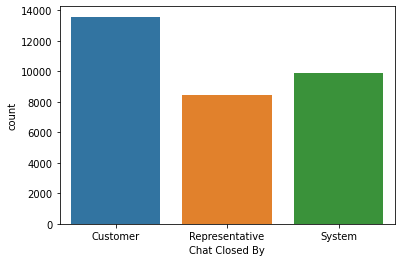

In [71]:
##Infer insights of Data after All the above process are completed using Visualization
####Count of categorical data
sns.countplot(df["Chat Closed By"])

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interactive Chat', ylabel='count'>

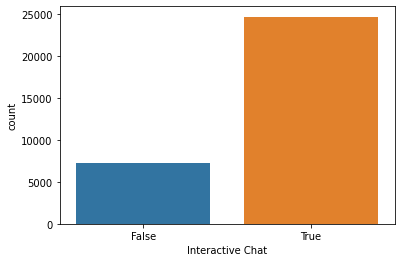

In [72]:
sns.countplot(df["Interactive Chat"])

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Browser', ylabel='count'>

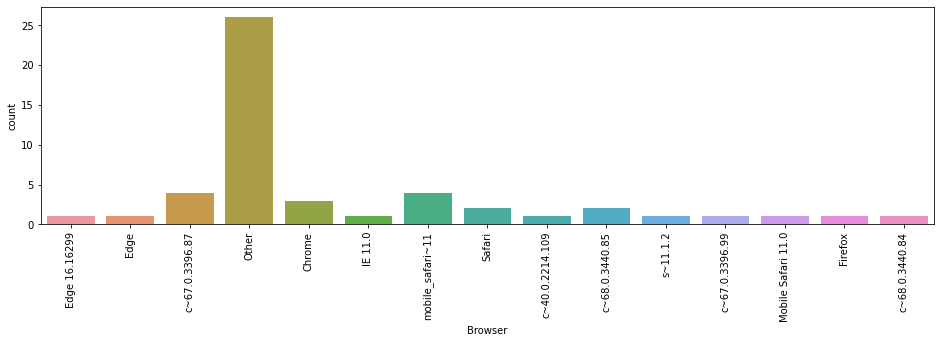

In [74]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(df["Browser"][:50])

<AxesSubplot:xlabel='Chat Duration', ylabel='Count'>

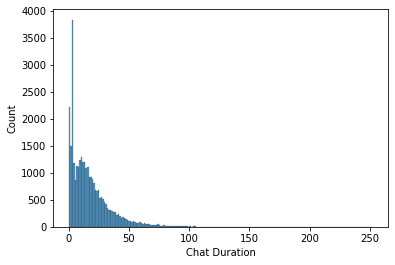

In [76]:
## Histogram for discrete data to understand central tendency of data
sns.histplot(df["Chat Duration"])

<AxesSubplot:xlabel='Response Time of Agent', ylabel='Count'>

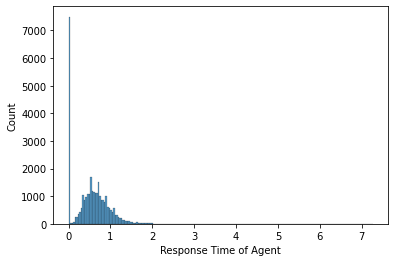

In [83]:
sns.histplot(df["Response Time of Agent"])

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chat Duration'>

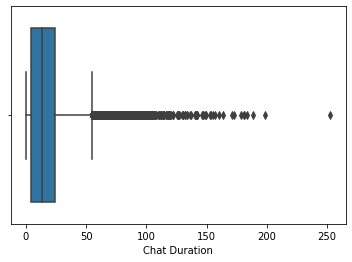

In [81]:
sns.boxplot(df["Chat Duration"])

In [84]:
df.head(2)

,Agent,Chat Duration,Teams,Order Value,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time
0,Zaha,18.366667,Mobile Service Team,0,Customer,True,Edge 16.16299,Windows-10,Sweden,1.033333,0.716667,,,False,0.016667
1,Berenice,3.083333,Mobile Technical Team,0,Representative,False,Edge,Windows,Australia,0.000000,0.000000,,,True,1.016667


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


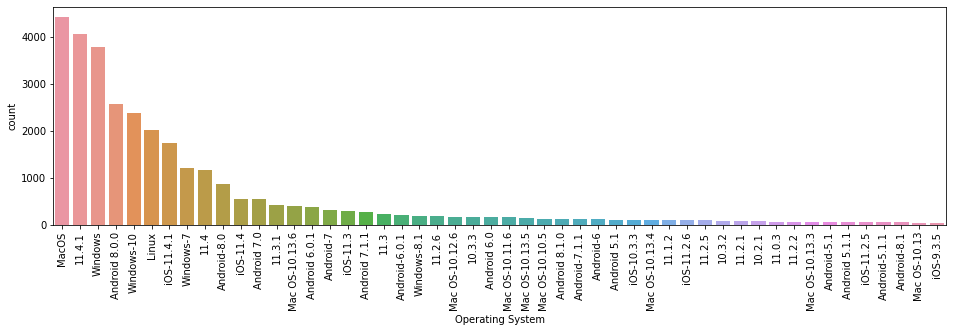

In [89]:
plt.figure(figsize=(16,4))
sns.countplot(df["Operating System"],order=df["Operating System"].value_counts().index[:50])
plt.xticks(rotation=90)
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


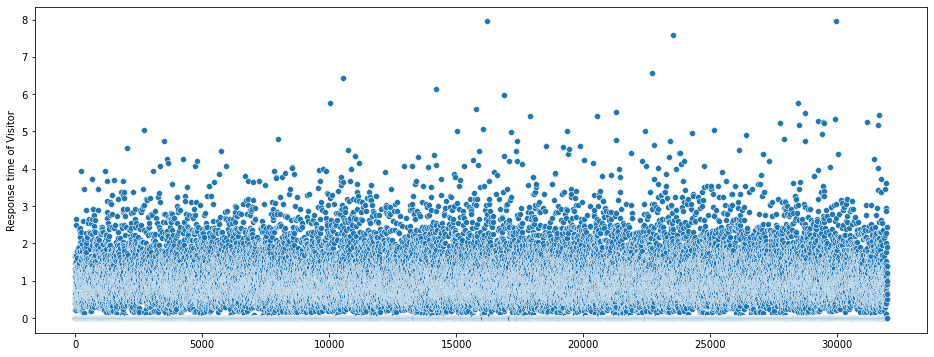

In [90]:
plt.figure(figsize=(16,6))
sns.scatterplot(df.index,df["Response time of Visitor"])
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


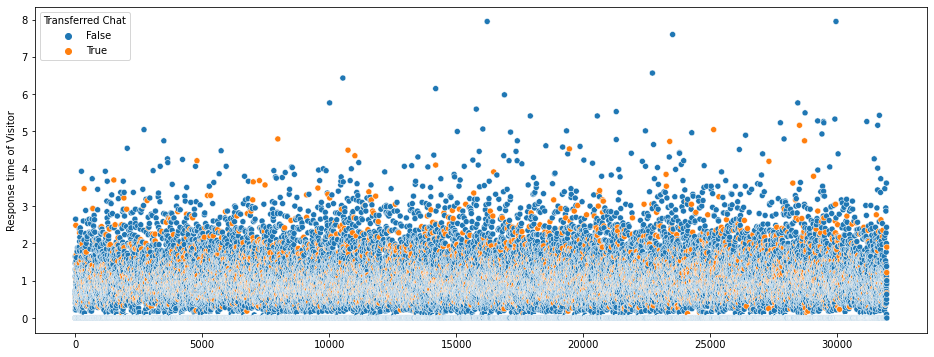

In [91]:
plt.figure(figsize=(16,6))
sns.scatterplot(df.index,df["Response time of Visitor"],hue=df["Transferred Chat"])
plt.show()

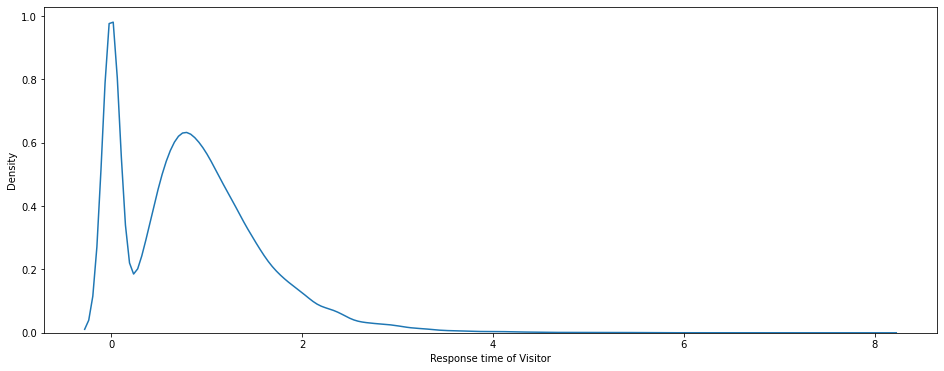

In [92]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Response time of Visitor"])
plt.show()

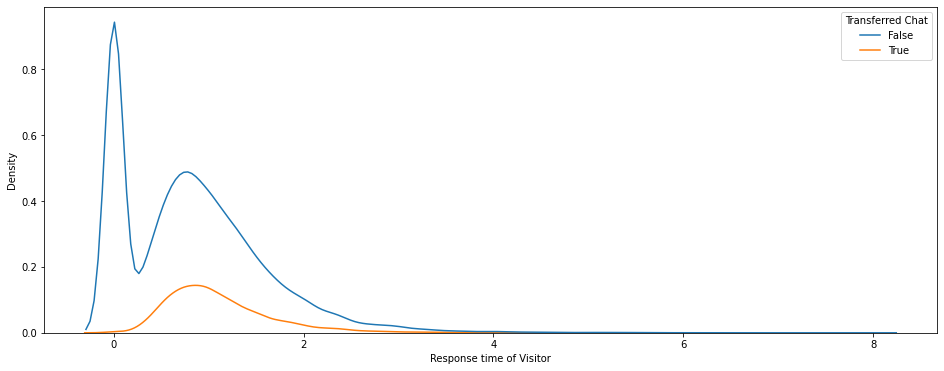

In [93]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Response time of Visitor"],hue=df["Transferred Chat"])
plt.show()

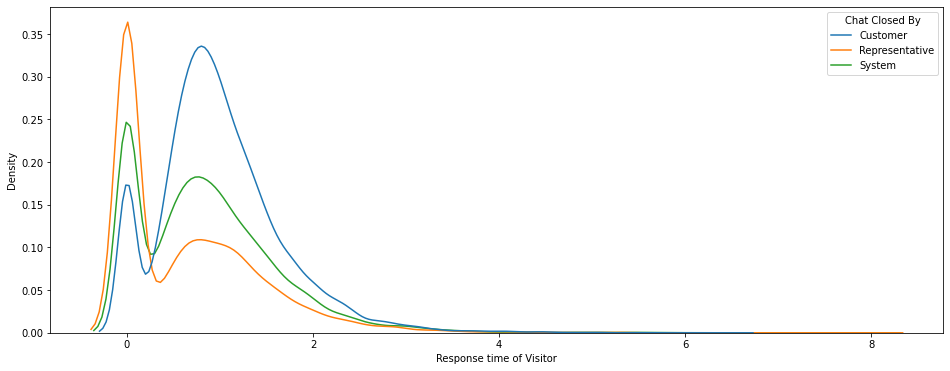

In [94]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Response time of Visitor"],hue=df["Chat Closed By"])
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


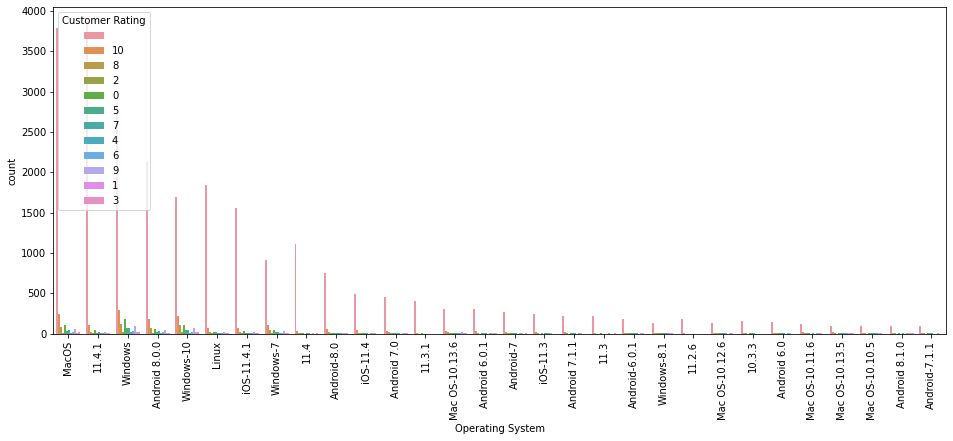

In [95]:
plt.figure(figsize=(16,6))
sns.countplot(df["Operating System"],hue=df["Customer Rating"],order=df["Operating System"].value_counts().index[:30])
plt.xticks(rotation=90)
plt.show()

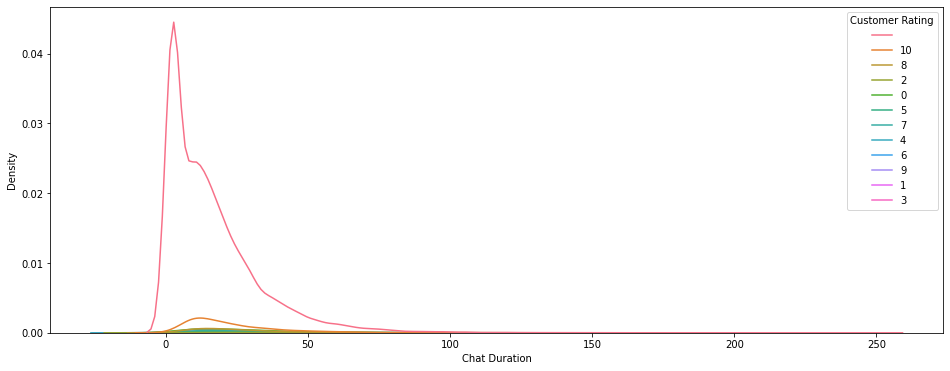

In [96]:
plt.figure(figsize=(16,6))
sns.kdeplot(df["Chat Duration"],hue=df["Customer Rating"])
plt.show()